In [ ]:
#Importing Required Libraries

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import os
import random
import cv2
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
#Downloading and storing the MNIST Dataset

a,b = tf.keras.datasets.mnist.load_data(path='mnist.npz')

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#Getting the train and test images and labels for each image
train_X = a[0]
train_y = a[1]
test_X = b[0]
test_y = b[1]

In [ ]:
#Printing shapes of the training and testing datasets

print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Index:  25744


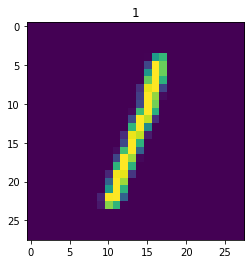

In [ ]:
#Printing a random image from training dataset along with its label as the title of th image(plot)
ran = random.randint(0,60000)
print("Index: ", ran)
plt.title(train_y[ran])
plt.imshow(train_X[ran])

Index:  8860


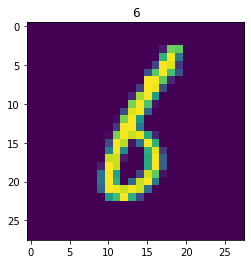

In [ ]:
#Printing another random image from training dataset along with its label as the title of th image(plot)
ran = random.randint(0,60000)
print("Index: ", ran)
plt.title(train_y[ran])
plt.imshow(train_X[ran])

Index:  8045


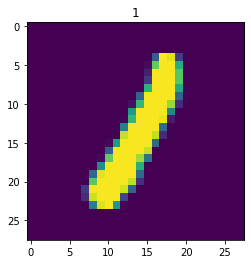

In [ ]:
#Printing a random image from testing dataset along with its label as the title of th image(plot)
ran = random.randint(0,10000)
print("Index: ", ran)
plt.title(test_y[ran])
plt.imshow(test_X[ran])

Index:  1905


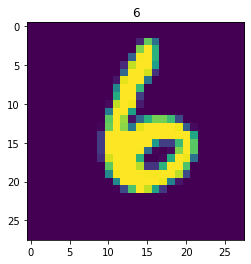

In [ ]:
#Printing another random image from testing dataset along with its label as the title of th image(plot)
ran = random.randint(0,10000)
print("Index: ", ran)
plt.title(test_y[ran])
plt.imshow(test_X[ran])

In [ ]:
#Initializing some model parameters
num_of_pixels = 784
num_of_classes = 10
batch_size = 200
epochs = 15

In [ ]:
#Reshaping the images from 28*28 arrays to a 784 vector for training and testing
train_X_act = train_X.reshape(-1, 784)
test_X_act = test_X.reshape(-1, 784)
print(train_X_act.shape)
print(test_X_act.shape)

(60000, 784)
(10000, 784)


In [ ]:
#One-Hot Encoding the target labels for training
train_y_act = to_categorical(train_y, 10)
test_y_act = to_categorical(test_y, 10)

In [ ]:
#Creating a Deep Learning model with 3 Dense Layers
model = keras.Sequential(
[
    layers.Dense(10, input_shape = (784,), activation = 'relu'),
    layers.Dense(20, activation = 'relu'),
    layers.Dense(10, activation = 'relu'),
    layers.Dense(10, activation = 'relu'),
    layers.Dense(num_of_classes, activation = 'softmax'),
]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,500
Trainable params: 8,500
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#If model exists, uncomment this and execute
model = tf.keras.models.load_model('MNIST_Model.h5')

In [ ]:
#Else, uncomment these lines and run
#model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
#history = model.fit(train_X_act, train_y_act, validation_split=0.1, epochs = epochs, batch_size = batch_size, verbose=1, shuffle=1)

In [ ]:
#Testing the model using the test data
result = model.evaluate(test_X_act, test_y_act, batch_size = batch_size)
print("Test Loss: ", result[0])
print("Test Accuracy", result[1])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


50/50 [==============================] - 0s 6ms/step - loss: 0.4664 - accuracy: 0.8719
Test Loss:  0.4664106070995331
Test Accuracy 0.8719000220298767


In [ ]:
#Saving the model
model.save("MNIST_Model.h5")

Prediction:  8


/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


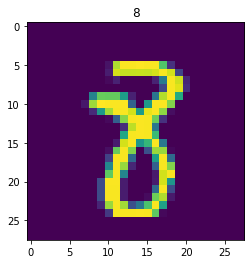

In [ ]:
#Checking the prediction of the model on a random picture from the test data
ran = random.randint(0,10000)
result = model.predict(test_X_act[ran].reshape(-1,784))
plt.title(test_y[ran])
plt.imshow(test_X[ran])
result_temp = np.where(result == np.amax(result))
print("Prediction: ", result_temp[1][0])

Prediction:  8


/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


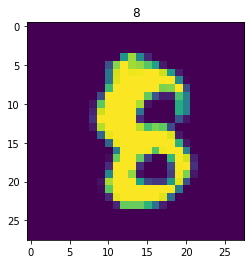

In [ ]:
#Checking the prediction of the model on a random picture from the test data
ran = random.randint(0,10000)
result = model.predict(test_X_act[ran].reshape(-1,784))
plt.title(test_y[ran])
plt.imshow(test_X[ran])
result_temp = np.where(result == np.amax(result))
print("Prediction: ", result_temp[1][0])

Prediction:  9


/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


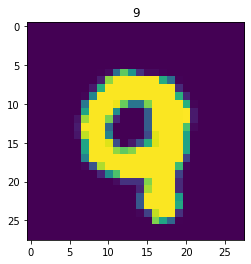

In [ ]:
#Checking the prediction of the model on a random picture from the test data
ran = random.randint(0,10000)
result = model.predict(test_X_act[ran].reshape(-1,784))
plt.title(test_y[ran])
plt.imshow(test_X[ran])
result_temp = np.where(result == np.amax(result))
print("Prediction: ", result_temp[1][0])

Prediction:  2


/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


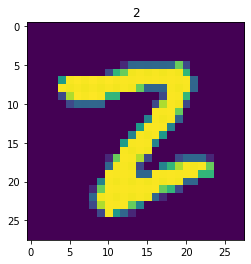

In [ ]:
#Checking the prediction of the model on a random picture from the test data
ran = random.randint(0,10000)
result = model.predict(test_X_act[ran].reshape(-1,784))
plt.title(test_y[ran])
plt.imshow(test_X[ran])
result_temp = np.where(result == np.amax(result))
print("Prediction: ", result_temp[1][0])

Prediction:  1


/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


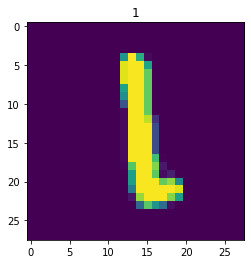

In [ ]:
#Checking the prediction of the model on a random picture from the test data
ran = random.randint(0,10000)
result = model.predict(test_X_act[ran].reshape(-1,784))
plt.title(test_y[ran])
plt.imshow(test_X[ran])
result_temp = np.where(result == np.amax(result))
print("Prediction: ", result_temp[1][0])